In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Desktop/ml-100k/u.data',sep='\t',header=None,names=['user_id','item_id','rating','timestamp'])
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [2]:
df = df.drop('timestamp',axis=1)
df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [3]:
ratings = df.pivot(index='user_id',columns='item_id',values='rating')
ratings.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Εδώ υλοποιούνται οι συναρτήσεις για την εύρεση της γειτονίας και για την εύρεση των ταινιών τις οποίες έχει ήδη αξιολογήσει ο χρήστης.
Η user_rated_movies επιστρέφει τις θέσεις των ταινιών που έχει ήδη αξιολογήσει ο χρήστης και θα χρειαστεί στην συνάρτηση mutate() για την μετάλλαξη όπου ελέγχουμε αν το γονίδιο που επιλέχθηκε αντιστοιχεί σε ταινία που έχει ήδη αξιολογήσει ο χρήστης.

Η find_neighborhood επιστρέφει ένα numpy array 10x1682 με τα 10 διανύσματα αξιολογήσεων(άτομα) που είναι πιο κοντά στον χρήστη σύμφωνα με την συσχέτιση Pearson και τα όσα αναφέρονται στην εκφώνηση... 

In [4]:
from random import randint
import random
from random import choice
from scipy.stats import pearsonr
import math

def find_neighborhood(user_id):
    pearson_metric = []
    dict_metric = {} # to correlation tou user_id me ton kathe ena apo tous ipoloipous
    for i in range(1,len(ratings)+1):
        if i==user_id:
            continue
#         corr = (pearsonr(ratings.loc[user_id].fillna(0),ratings.loc[i].fillna(0))[0]-(-1))/2
        corr = pearsonr(ratings.loc[user_id].fillna(0),ratings.loc[i].fillna(0))[0]
        pearson_metric.append(corr)
        dict_metric[i] = corr
    pearson_metric.sort(reverse=True)
    user_indexes = [] # ta loc sto ratings
    for user,pearson in dict_metric.items():
        for i in range(len(pearson_metric[:10])):
            if pearson==pearson_metric[i]:
                user_indexes.append(user) # ta id twn users me tin megaliteri sisxetisi me ton user_id
#     print(user_indexes)
    # kai me auta ta user_indexes ftiaxnw to dataframe
    data = pd.DataFrame(ratings,index=user_indexes)
    data = np.array(data)
    data = np.nan_to_num(data)
    return data

# epistrefei lista me tis theseis poy exei aksiologisei o user_id
def user_rated_movies(user_id):
    rated_movies = []
    for i in range(len(ratings.loc[user_id])):
        if not math.isnan(np.array(ratings.loc[user_id])[i]):
            rated_movies.append(i)
    return rated_movies

In [5]:
print(user_rated_movies(1))
# oi theseis twn tainiwn pou exei aksiologisei o user_1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [6]:
# oi theseis me perisoteres apo 400 aksiologiseis
res = ratings.count(axis='columns')
# print(res)
for i in range(1,len(ratings.count(axis='columns'))):
    if res[i]>400:
        print(i)

7
13
181
234
276
279
303
393
405
416
429
450
537
655
846


In [7]:
find_neighborhood(1)

array([[4., 3., 0., ..., 0., 0., 0.],
       [3., 2., 1., ..., 0., 0., 0.],
       [5., 4., 3., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 4., 0., ..., 0., 0., 0.],
       [4., 3., 3., ..., 0., 0., 3.]])

#### Η συνάρτηση create_individual(data) παίρνει σαν όρισμα την γειτονιά του χρήστη (το data) και δημιοιυργεί τον αρχικό πληθυσμο. Στον αρχικό πληθυσμό κάθε άτομο έχει στα γονίδια που αντιστοιχούν στις ταινίες που έχει αξιολογήσει ήδη ο χρήστης την βαθμολογία του χρήστη και στα υπόλοιπα γονίδια, την μέση βαθμολογία των χρηστών που ανήκουν στην γειτονιά του χρήστη αν τουλάχιστον ένας έχει αξιολογήσει την ταινία, αλλιώς μια τυχαία τιμή στο διάστημα [1,5]
Επιλέγοντας διαφορετικό user_id εκτελουνται όλες οι λειτουργίες για το εκάστοτε χρήστη...

In [8]:
user_id = 1 # epilegw user
data = find_neighborhood(user_id)
def create_individual(data):
    individual = np.array(ratings.loc[user_id].fillna(0)) # ola ta nan tou epilegmenou user einai 0
    user = np.array(ratings.loc[user_id])
    for i in range(len(user)):
        cluster_ratings = []
        if math.isnan(user[i]):
            for j in range(len(data)):
                if data[j][i]!=0:
                    cluster_ratings.append(data[j][i])
            if len(cluster_ratings)>0:
                individual[i] = sum(cluster_ratings)/len(cluster_ratings) # o mesos oros twn aksiologisewn sto cluster xristwn
            else:
                individual[i] = random.randint(1,5) # alliws tixai timi 1 ews 5
    return individual

    
def crossover(parent_1,parent_2):
    crossover_index = random.randrange(1,len(parent_1)) # thesi tis diastaurwsis
    child_1a = parent_1[:crossover_index]
    child_1b = parent_2[crossover_index:]
    child_1 = list(child_1a) + list(child_1b)
    
    child_2a = parent_2[:crossover_index]
    child_2b = parent_1[crossover_index:]
    child_2  = list(child_2a) + list(child_2b)
    return np.array(child_1), np.array(child_2)


def fitness(individual,data):
    fitness = 0
    for i in range(len(data)):
#         corr = (pearsonr(individual,data[i])[0]-(-1))/2 #-> to kanonikopoiei sto [0,1]
        corr = pearsonr(individual,data[i])[0]
        fitness += corr
    return fitness/len(data)


def mutate(individual):
    mutate_index = random.randrange(1,len(individual))
    # an exei epilegei thesi pou o xristis eixe dwsei aksiologisi min kaneis tpt
    if mutate_index in user_rated_movies(user_id):
        None
    else:
        individual[mutate_index] = choice([k for k in range(1,6) if k not in [individual[mutate_index]]])
    # alliws dinw mia tixai timi diaforetiki apo autin pou iparxei idi
            


#### Καθορίζουμε τις εκάστοτε παραμέτρους με την κλήση pyeasga.GeneticAlgorithm()...

###### pop_size = 20, Pc=0.6 και Pm = 0.00

In [9]:
from pyeasyga import pyeasyga
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=20,
                              generations=100,
                              crossover_probability=0.6,
                              mutation_probability=0.0,
                              elitism=False,
                              maximise_fitness=True)

In [106]:
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
# ga.run()


Mean result = 0.22147871098919253


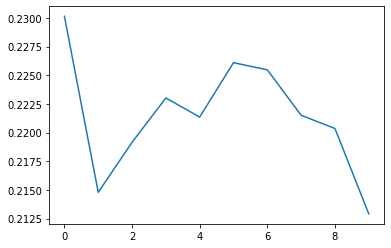

In [74]:
import matplotlib.pyplot as plt
results = []
 
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

In [75]:
# endeiktika to kalitero atomo apo tin teleutaia ektelesi kai i sisxetisi tou me tin geitonia
ga.best_individual()

(0.21290119938847435, array([5., 3., 4., ..., 2., 5., 3.]))

###### pop_size = 20, Pc=0.6 και Pm = 0.01

Mean result = 0.21724532074673514


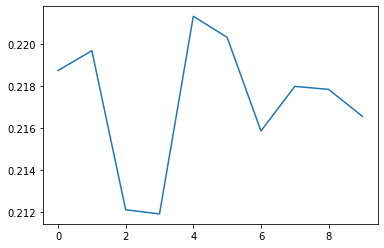

In [71]:
# 20 - 0.6-0.01 kai 100 generations
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=20,
                              generations=100,
                              crossover_probability=0.6,
                              mutation_probability=0.01,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

###### pop_size = 20, Pc=0.6 και Pm = 0.1

Mean result = 0.23500970369389199


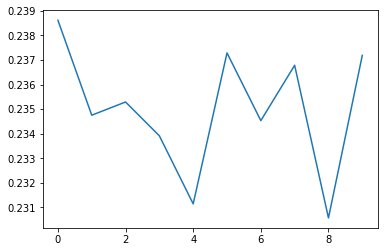

In [70]:
# 20-0.6-0.1 kai 100 generations
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=20,
                              generations=100,
                              crossover_probability=0.6,
                              mutation_probability=0.1,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

#### Εδω κάνουμε και μια δοκιμαστική εκτέλεση με χρήση ελιτισμού για την περίπτωση όπου έχω Pc = 0.6 και Pm=0.01

Mean result = 0.22099447971240024


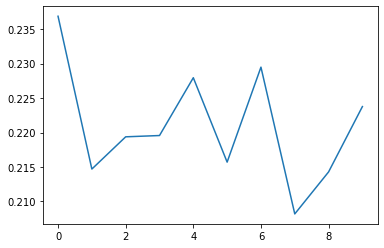

In [15]:
import matplotlib.pyplot as plt
# mia dokimi kai me elitismo
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=20,
                              generations=100,
                              crossover_probability=0.6,
                              mutation_probability=0.01,
                              elitism=True,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

###### pop_size = 20, Pc=0.9 και Pm = 0.01

Mean result = 0.22528024467444907


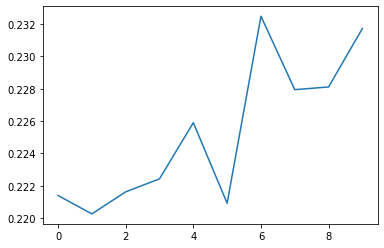

In [77]:
# 20-0.9-0.01 kai genrations...
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=20,
                              generations=100,
                              crossover_probability=0.9,
                              mutation_probability=0.01,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

###### pop_size = 20, Pc=0.1 και Pm = 0.01

Mean result = 0.20841229218280682


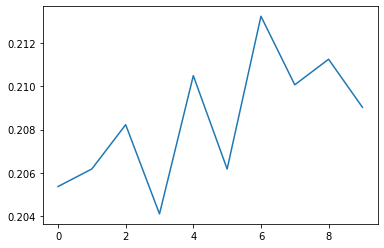

In [78]:
# 20-0.1-0.01
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=20,
                              generations=100,
                              crossover_probability=0.1,
                              mutation_probability=0.01,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

###### pop_size = 200, Pc=0.6 και Pm = 0.00

Mean result = 0.24449265359437108


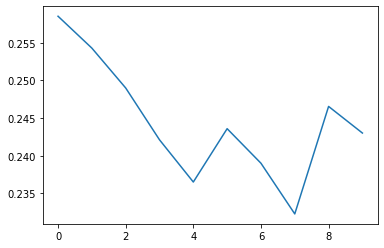

In [79]:
# 200-0.6-00
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=200,
                              generations=100,
                              crossover_probability=0.6,
                              mutation_probability=0.00,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

###### pop_size = 200, Pc=0.6 και Pm = 0.01

Mean result = 0.2582497765213844


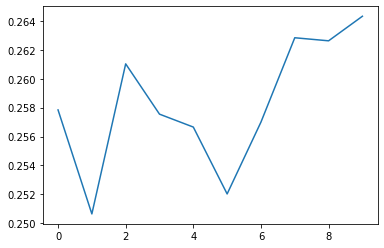

In [91]:
# 200-0.6-0.01
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=200,
                              generations=100,
                              crossover_probability=0.6,
                              mutation_probability=0.01,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

###### Εδώ έχω δοκιμάσει έναν συνδυασμό παραμέτρων που δεν δίνεται στον σχετικό πίνακα άλλα έδωσε τα καλύτερα γενικά αποτελέσματα....
###### pop_size = 200, Pc=0.6 και Pm = 0.1

Mean result = 0.30200197520263466


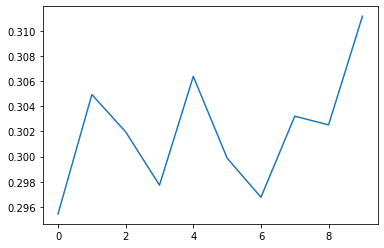

In [208]:
# 200-0.6-0.1
# DEN TO EXEI STON PINAKA
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=200,
                              generations=100,
                              crossover_probability=0.6,
                              mutation_probability=0.1,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

###### pop_size = 200, Pc=0.1 και Pm = 0.01

Mean result = 0.24014625781349444


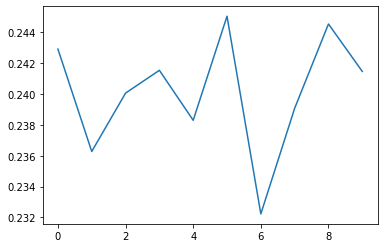

In [81]:
# 200-0.1-0.01
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=200,
                              generations=100,
                              crossover_probability=0.1,
                              mutation_probability=0.01,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

###### pop_size = 200, Pc=0.9 και Pm = 0.01

Mean result = 0.26642139764056394


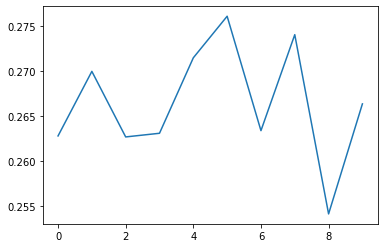

In [89]:
# 200-0.9-0.01
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=200,
                              generations=100,
                              crossover_probability=0.9,
                              mutation_probability=0.01,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
results = []
for _ in range(10):
    ga.run()
    results.append(ga.best_individual()[0])
print(f'Mean result = {sum(results)/len(results)}')
plt.plot(results)

#### Αφαιρώ τις 10 πρώτες αξιολογήσεις του user_1 απο το dataset για να δώ RMSE και MAE για τις 10 αξιολογήσεις που θα προβλέψει ο γενετικός αλγόριθμος

In [92]:
# TESTING
testing_ratings = ratings.iloc[0,0:10].copy() # kai xrisimopoiw auto meta gia ta rmse kai mae
ratings.iloc[0,0:10] = np.nan
print(testing_ratings)
ratings.head()

item_id
1     5.0
2     3.0
3     4.0
4     3.0
5     3.0
6     5.0
7     4.0
8     1.0
9     5.0
10    3.0
Name: 1, dtype: float64


item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
user_id = 1
data = find_neighborhood(user_id)

In [94]:
data

array([[4., 3., 0., ..., 0., 0., 0.],
       [3., 2., 1., ..., 0., 0., 0.],
       [5., 4., 3., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 4., 0., ..., 0., 0., 0.],
       [4., 3., 3., ..., 0., 0., 3.]])

###### Εκτελώ με τις καλύτερες παραμέτρους , δλδ pop_size = 200, Pc=0.9 και Pm = 0.01

In [95]:
# 200-0.9-0.01 - htan oi kaliteres parametroi
ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=200,
                              generations=100,
                              crossover_probability=0.9,
                              mutation_probability=0.01,
                              elitism=False,
                              maximise_fitness=True)
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness

ga.run()

###### Και βλέπουμε RMSE και MAE...

In [96]:
from math import sqrt
from sklearn.metrics import mean_absolute_error


def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print(np.array(testing_ratings))
print(ga.best_individual()[1][:10])
print(f'RMSE gia tis 10 prwtes aksiologiseis tou user_1: {rmse(testing_ratings, ga.best_individual()[1][:10])}')
print(f'MAE gia tis 10 prwtes aksiologiseis tou user_1: {mean_absolute_error(testing_ratings,ga.best_individual()[1][:10])}')

[5. 3. 4. 3. 3. 5. 4. 1. 5. 3.]
[4.1        3.14285714 2.33333333 4.11111111 3.25       1.
 4.2        4.33333333 4.6        4.33333333]
RMSE gia tis 10 prwtes aksiologiseis tou user_1: 1.8437500571163798
MAE gia tis 10 prwtes aksiologiseis tou user_1: 1.3337301587301589


In [98]:
# epeidi eixa afairesei idi prin tis 10 prwtes tou user 1 ksanaorizw to dataset
ratings = df.pivot(index='user_id',columns='item_id',values='rating')

###### Για τους πρώτους 50 users στο dataset κρατάω ένα dict για τον καθένα με τις 10 αξιολογήσεις του και ένα dict με τις θέσεις που βρέθηκαν αυτές οι 10 αξιολογήσεις ώστε να ξέρουμε με ποια γονίδια της λύσης να συκγρίνουμε τις αξιολογήσεις

In [100]:
user_ratings = {}
user_ratings_pos = {} # gia kathe user tis theseis twn 10 prwtwn ratings
for i in range(1,51): # 50 prwtoi users
    first_ratings = [] # oi 10 prwtes aksiologiseis kathe user
    for j in range(1,len(ratings.loc[i])):
        if len(first_ratings)==10:
            break
        if not math.isnan(ratings.loc[i][j]):
            first_ratings.append(ratings.loc[i][j])
    user_ratings_pos[i] = [x+1 for x in user_rated_movies(i)[:10]]  # oi theseis(loc) twn 10 prwtwn aksiologisewn tou user_i
    user_ratings[i] = first_ratings # o user_i exei autes tis 10 aksiologiseis
print(user_ratings_pos[1])
# thelw kai ta positions omws gia na kserw me poia tha sigkrinw apo to ga.best_individual()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [101]:
user_ratings_pos # oi theseis twn 10 prwtwn ratings twn 50 prwtwn users

{1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 2: [1, 10, 13, 14, 19, 25, 50, 100, 111, 127],
 3: [181, 245, 258, 260, 264, 268, 271, 272, 288, 294],
 4: [11, 50, 210, 258, 260, 264, 271, 288, 294, 300],
 5: [1, 2, 17, 21, 24, 25, 29, 40, 42, 50],
 6: [1, 7, 8, 9, 12, 13, 14, 15, 19, 21],
 7: [4, 7, 8, 9, 10, 11, 12, 22, 23, 25],
 8: [7, 11, 22, 50, 55, 56, 79, 82, 89, 96],
 9: [6, 7, 50, 201, 242, 276, 286, 294, 298, 340],
 10: [1, 4, 7, 9, 11, 12, 13, 16, 22, 23],
 11: [8, 9, 11, 12, 15, 22, 24, 25, 28, 29],
 12: [4, 15, 28, 50, 69, 71, 82, 88, 96, 97],
 13: [1, 2, 4, 5, 7, 8, 9, 11, 12, 13],
 14: [7, 9, 12, 13, 14, 15, 18, 19, 22, 23],
 15: [1, 7, 9, 13, 14, 15, 18, 20, 25, 50],
 16: [1, 4, 7, 8, 9, 11, 12, 15, 22, 27],
 17: [1, 7, 9, 13, 100, 111, 117, 125, 126, 137],
 18: [1, 4, 6, 8, 9, 12, 13, 14, 15, 19],
 19: [4, 8, 153, 201, 202, 210, 211, 258, 268, 288],
 20: [1, 11, 15, 22, 50, 69, 82, 87, 94, 95],
 21: [1, 5, 7, 9, 15, 17, 50, 53, 56, 98],
 22: [2, 4, 17, 21, 24, 29, 50, 53, 62, 68

###### Για κάθε έναν απο τους 50 users εκτελώ τον γενετικό και στο διάνυσμα ga_result κρατάω εκείνες τις αξιολογήσεις της βέλτιστης λύσης που αντιστοιχούν στις θέσεις των 10 αξιολογήσεων που έχω κρατήσει για τον εκάστοτε χρήστη
###### Στην συνέχεια εκτυπώνεται για τον καθένα το πραγματικό διάνυσμα αξιολογήσεων, αυτό που προβλέφθηκε απο τον γενετικό και τα RSME και MAE

In [102]:
from math import sqrt
from sklearn.metrics import mean_absolute_error

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

for key,value in user_ratings_pos.items():
    user_id = key # oi xristes 1-50
    data = find_neighborhood(key)
    ga = pyeasyga.GeneticAlgorithm(data,
                              population_size=200,
                              generations=100,
                              crossover_probability=0.9,
                              mutation_probability=0.01,
                              elitism=False,
                              maximise_fitness=True)
    ga.create_individual = create_individual
    ga.crossover_function = crossover
    ga.fitness_function = fitness
    ga.run()
    ga_result = []
    for pos in value:
        ga_result.append(ga.best_individual()[1][pos])
    print(f'Gia ton user_{key}:\n')
    print(f'actual ratings: {user_ratings[key]}\n  predicted : {ga_result}\n')
    print(f'rmse: {rmse(np.array(ga_result),np.array(user_ratings[key]))}\n')
    print(f'mae : {mean_absolute_error(ga_result,user_ratings[key])}\n')

Gia ton user_1:

actual ratings: [5.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 1.0, 5.0, 3.0]
  predicted : [3.0, 4.0, 3.0, 3.0, 0.0, 4.0, 1.0, 5.0, 3.0, 2.0]

rmse: 2.1447610589527217

mae : 1.8

Gia ton user_2:

actual ratings: [4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 5.0, 5.0, 4.0, 5.0]
  predicted : [1.0, 4.0, 4.0, 3.8, 3.5, 1.0, 1.0, 3.0, 3.0, 4.0]

rmse: 2.104518947408172

mae : 1.67

Gia ton user_3:

actual ratings: [4.0, 1.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0]
  predicted : [2.0, 4.0, 2.6666666666666665, 2.5, 1.0, 3.875, 2.0, 1.0, 2.5, 4.0]

rmse: 1.5398074374558801

mae : 1.3541666666666665

Gia ton user_4:

actual ratings: [4.0, 5.0, 3.0, 5.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0]
  predicted : [5.0, 2.0, 2.0, 3.3333333333333335, 2.0, 4.0, 3.5, 2.0, 2.0, 5.0]

rmse: 1.7896306260728156

mae : 1.5166666666666666

Gia ton user_5:

actual ratings: [4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 4.0]
  predicted : [3.0, 2.0, 1.0, 4.0, 3.0, 1.0, 4.0, 2.0, 1.0, 3.0]

rmse: 1.9493588689617927

mae : 1.6

Gia

Gia ton user_41:

actual ratings: [4.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0]
  predicted : [3.0, 3.0, 5.0, 5.0, 5.0, 2.0, 3.5, 3.0, 4.0, 5.0]

rmse: 1.0606601717798212

mae : 0.95

Gia ton user_42:

actual ratings: [5.0, 5.0, 4.0, 4.0, 3.0, 5.0, 3.0, 2.0, 3.0, 5.0]
  predicted : [5.0, 1.0, 4.0, 5.0, 2.0, 3.25, 3.5, 3.0, 3.0, 3.2]

rmse: 1.5985149358076076

mae : 1.105

Gia ton user_43:

actual ratings: [5.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 2.0]
  predicted : [3.6666666666666665, 4.0, 4.0, 3.0, 4.0, 4.0, 2.5, 5.0, 3.0, 5.0]

rmse: 1.4841757907262125

mae : 1.0833333333333335

Gia ton user_44:

actual ratings: [4.0, 4.0, 5.0, 5.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0]
  predicted : [3.1666666666666665, 1.0, 3.0, 4.5, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0]

rmse: 1.4813657362192647

mae : 1.2333333333333334

Gia ton user_45:

actual ratings: [5.0, 3.0, 5.0, 4.0, 3.0, 3.0, 4.0, 5.0, 5.0, 4.0]
  predicted : [5.0, 4.0, 3.0, 1.0, 3.0, 4.0, 3.0, 1.0, 5.0, 5.0]

rmse: 1.816590212458495

mae : 1.